In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the online file by the URL provides above, and assign it to variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path,header=None)

In [3]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.to_csv("cars.csv",index=False)

## Remove rows with ? in  price 

In [6]:
df.drop(df.loc[df['price'] == '?'].index, inplace=True)

In [7]:
df['price'] = df['price'].astype('float')

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


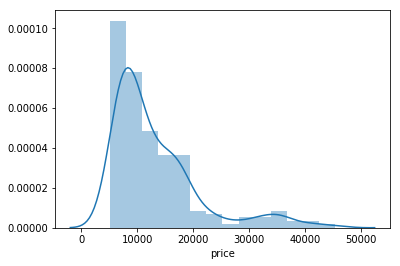

In [8]:
sns.distplot(df['price'])

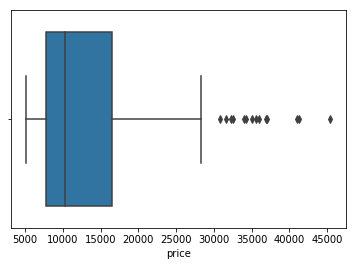

In [9]:
sns.boxplot(df['price'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [11]:
df.shape

(201, 26)

In [12]:
# pick up only required fields 
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','engine-size','horsepower','city-mpg','highway-mpg','price']
cars = df.loc[: , features]

In [13]:
cars.shape

(201, 10)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
make            201 non-null object
fuel-type       201 non-null object
num-of-doors    201 non-null object
body-style      201 non-null object
drive-wheels    201 non-null object
engine-size     201 non-null int64
horsepower      201 non-null object
city-mpg        201 non-null int64
highway-mpg     201 non-null int64
price           201 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 17.3+ KB


In [15]:
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [16]:
cars.shape

(201, 10)

## Univariant Analysis 

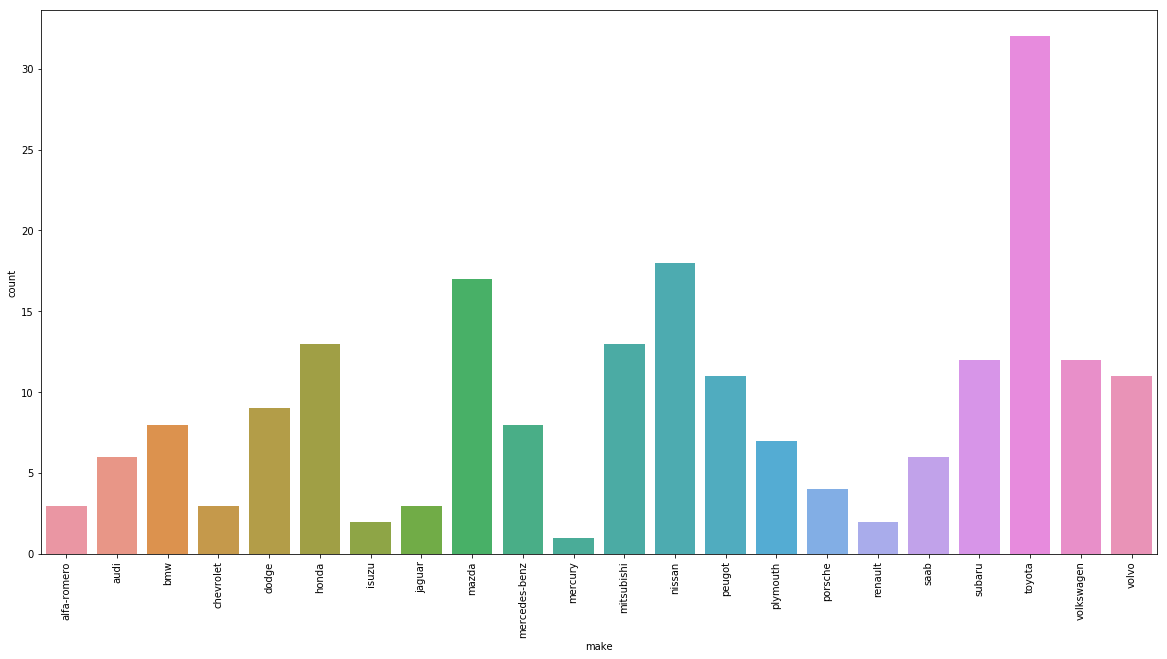

In [17]:
# Understand distribution of make
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.countplot(cars['make'])

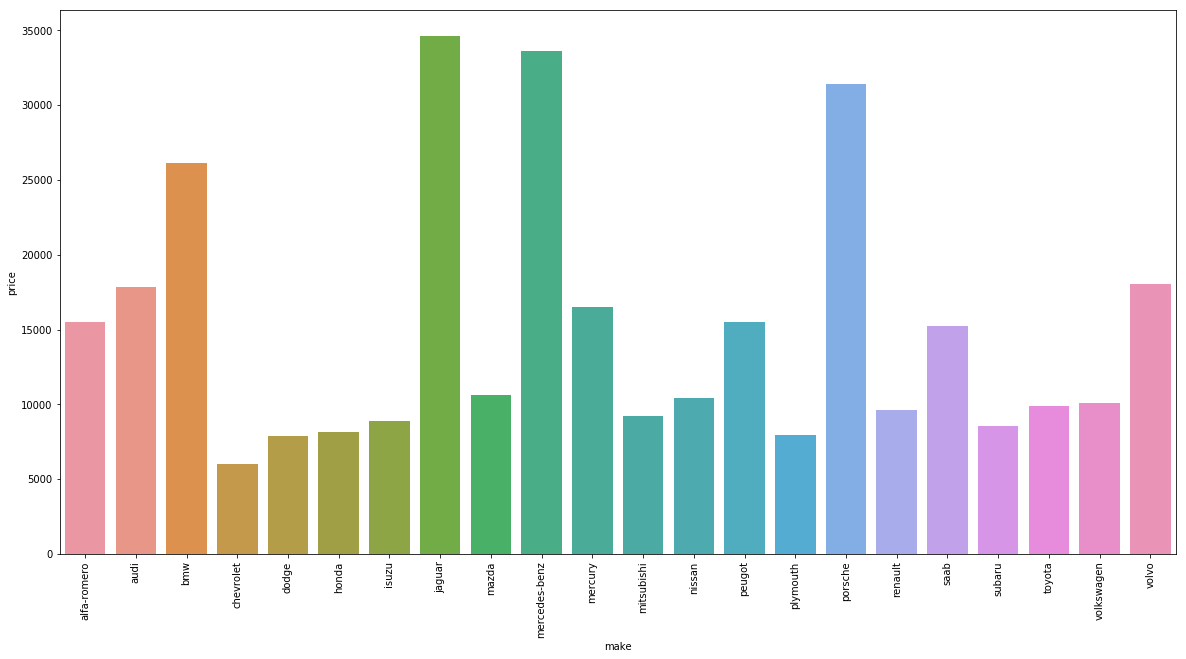

In [18]:
g = cars[['make','price']].groupby('make', as_index = False).mean()
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['price'])

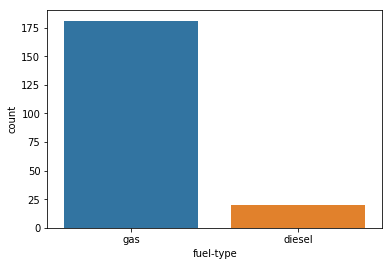

In [19]:
# Understand distribution of fuel-type
sns.countplot(cars['fuel-type'])

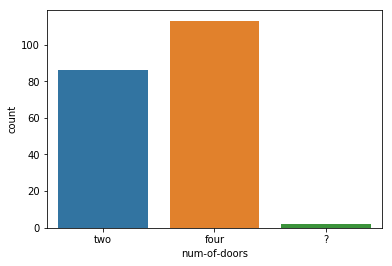

In [20]:
# Understand distribution of fuel-type
sns.countplot(cars['num-of-doors'])

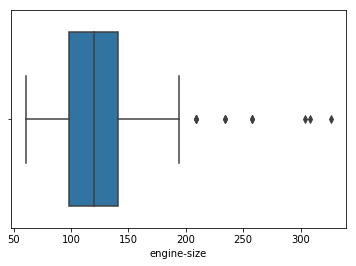

In [21]:
# Understand distribution of engine-size
sns.boxplot(cars['engine-size'])

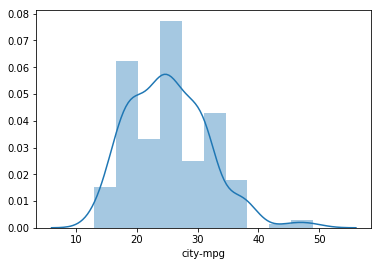

In [22]:
# Understand distribution of city-mpg
sns.distplot(cars['city-mpg'])

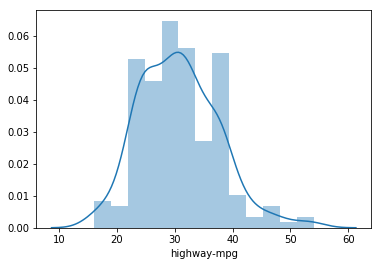

In [23]:
# Understand distribution of highway-mpg
sns.distplot(cars['highway-mpg'])

## Bi-variant Analysis

In [24]:
## Compare make with price 
g = cars.groupby('make', as_index=False)['price'].mean()

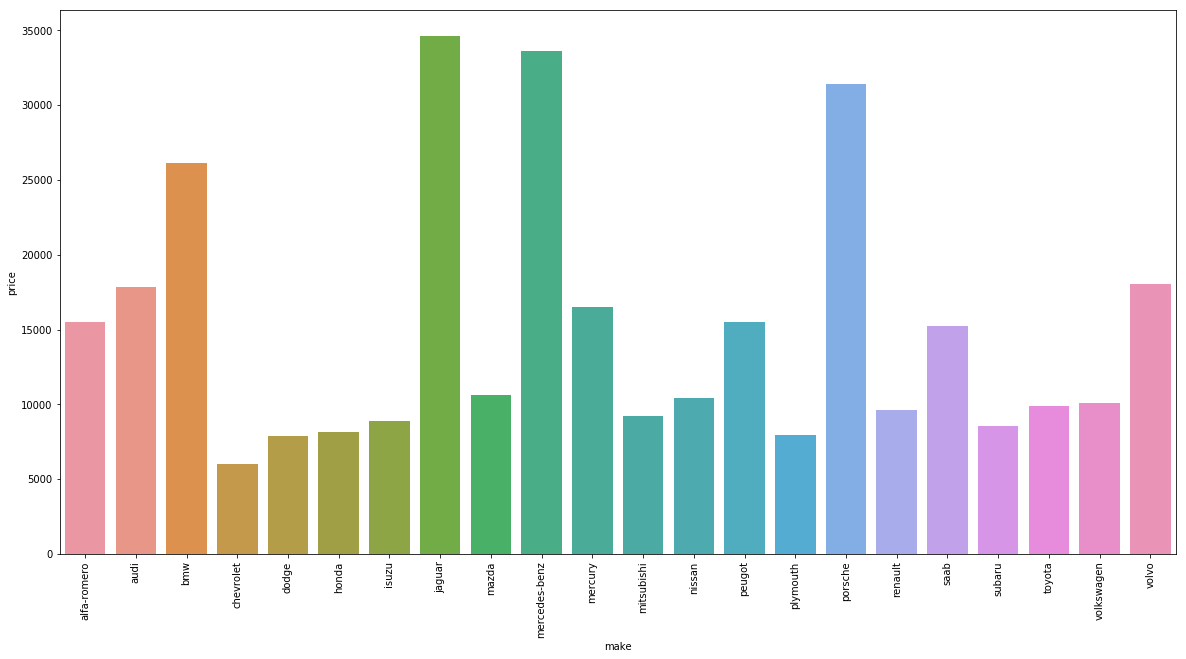

In [25]:
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.barplot(y='price',x ='make', data=g)

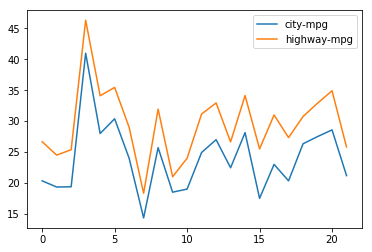

In [26]:
## Compare city-mpg and highway-mpg for each make 
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()
g.plot()

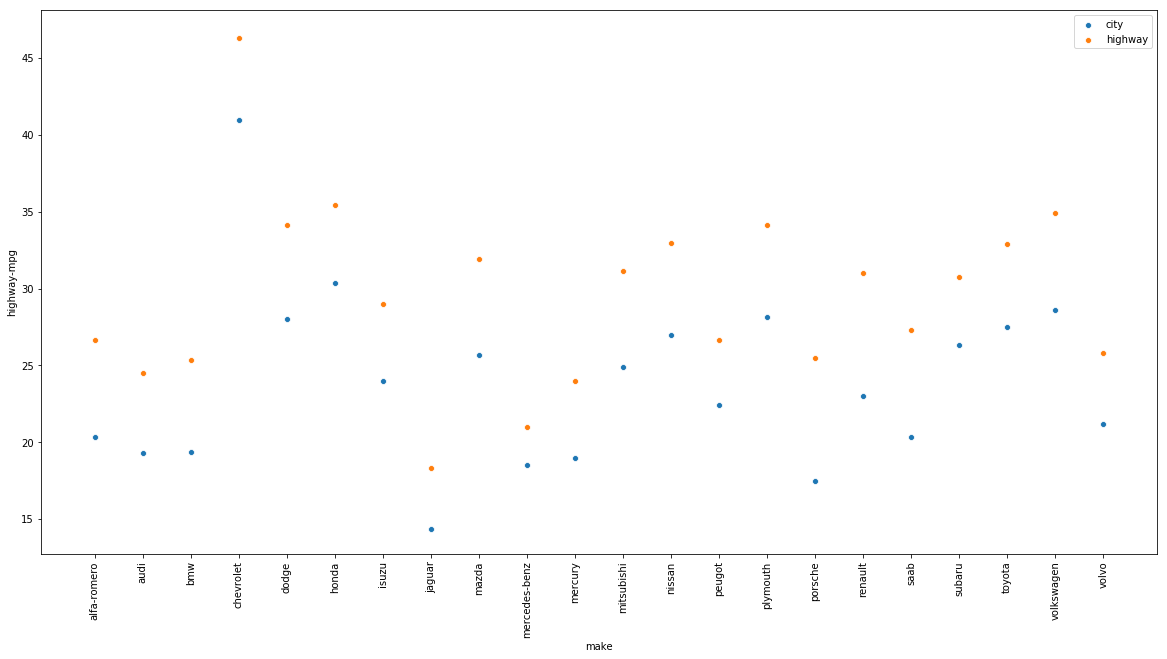

In [27]:
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()
plt.gcf().set_size_inches(20,10)
plt.xticks( rotation = 'vertical')
sns.scatterplot( y = 'city-mpg', x = "make", data = g, label="city")
sns.scatterplot( y = 'highway-mpg', x = 'make', data = g , label = 'highway')

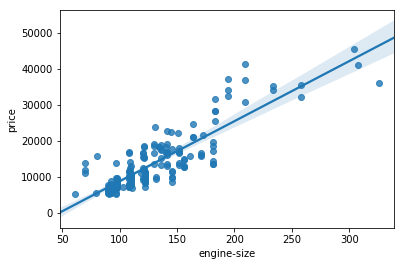

In [28]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = cars)

## Handling missing or incorrect values 

In [29]:
cars.describe(include='all')

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-size,horsepower,city-mpg,highway-mpg,price
count,201,201,201,201,201,201.000000,201,201.000000,201.000000,201.000000
unique,22,2,3,5,3,NaN,59,NaN,NaN,NaN
top,toyota,gas,four,sedan,fwd,NaN,68,NaN,NaN,NaN
freq,32,181,113,94,118,NaN,19,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,126.875622,NaN,25.179104,30.686567,13207.129353
std,NaN,NaN,NaN,NaN,NaN,41.546834,NaN,6.423220,6.815150,7947.066342
min,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,13.000000,16.000000,5118.000000
25%,NaN,NaN,NaN,NaN,NaN,98.000000,NaN,19.000000,25.000000,7775.000000
50%,NaN,NaN,NaN,NaN,NaN,120.000000,NaN,24.000000,30.000000,10295.000000
75%,NaN,NaN,NaN,NaN,NaN,141.000000,NaN,30.000000,34.000000,16500.000000


## Remove ? from num-of-doors 

In [30]:
# Remove ? from no. of doors
cars['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [31]:
# Replace ? in no-of-doors with four as that is mode 
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

In [32]:
cars['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

## Remove ? from horsepower 

In [33]:
cars.loc[cars['horsepower'] == '?', 'horsepower'].count()

2

In [34]:
hp_median = cars.loc[cars['horsepower'] != '?', 'horsepower'].median()
hp_median

95.0

In [35]:
# replace ? in horsepower with median()
cars.loc[ cars['horsepower'] == '?', 'horsepower'] = hp_median

In [36]:
cars['horsepower'] = cars['horsepower'].astype('float')

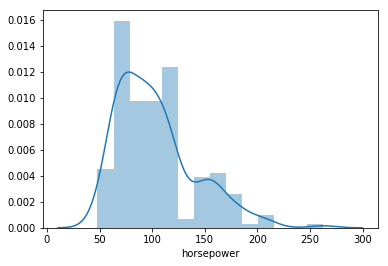

In [37]:
sns.distplot( cars['horsepower'])

In [38]:
cars.shape

(201, 10)

In [39]:
cars.describe()

,engine-size,horsepower,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,126.875622,103.313433,25.179104,30.686567,13207.129353
std,41.546834,37.374942,6.423220,6.815150,7947.066342
min,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,98.000000,70.000000,19.000000,25.000000,7775.000000
50%,120.000000,95.000000,24.000000,30.000000,10295.000000
75%,141.000000,116.000000,30.000000,34.000000,16500.000000
max,326.000000,262.000000,49.000000,54.000000,45400.000000


## Data transformation 

In [40]:
#Convert categorical variables to dummies
cars = pd.get_dummies(cars)

In [41]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [42]:
## create X and Y
y = cars['price']
X = cars 
X.drop(columns=['price'], inplace=True)

In [43]:
X.head()

,engine-size,horsepower,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [51]:
X.shape,y.shape

((201, 38), (201,))

## Build model using LinearRegression

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
model.coef_

array([ 6.33989092e+01,  5.06633744e+01, -6.32521289e+01, -4.27084050e+00,
       -2.40093703e+03,  3.97020979e+03,  7.04837997e+03, -8.12060453e+02,
       -2.80052560e+03, -1.78369867e+03, -3.44496747e+03,  6.60744567e+02,
       -8.30576226e+02,  9.46518757e+03, -2.16117040e+03, -3.64039729e+03,
       -2.76078603e+03,  4.30473135e+02, -3.10042526e+03,  1.06949536e+04,
       -3.60727221e+03,  1.10951218e+03, -3.09776220e+03, -2.87646992e+03,
       -1.31169808e+03,  1.24928606e+03,  9.50637188e+02, -9.50637188e+02,
        1.97368864e+02, -1.97368864e+02,  2.56661425e+03, -9.55766811e+02,
       -4.57640346e+02, -3.91874651e+02, -7.61332441e+02,  5.40298369e+02,
       -6.02276879e+02,  6.19785102e+01])

In [50]:
model.intercept_

3770.1911092158825

In [52]:
y_pred = model.predict(X_test)

In [53]:
model.score(X_test,y_test)

0.9140680034132762

In [54]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 6511092.46
R2 Score: 0.91
Mean Absolute Error : 1778.72


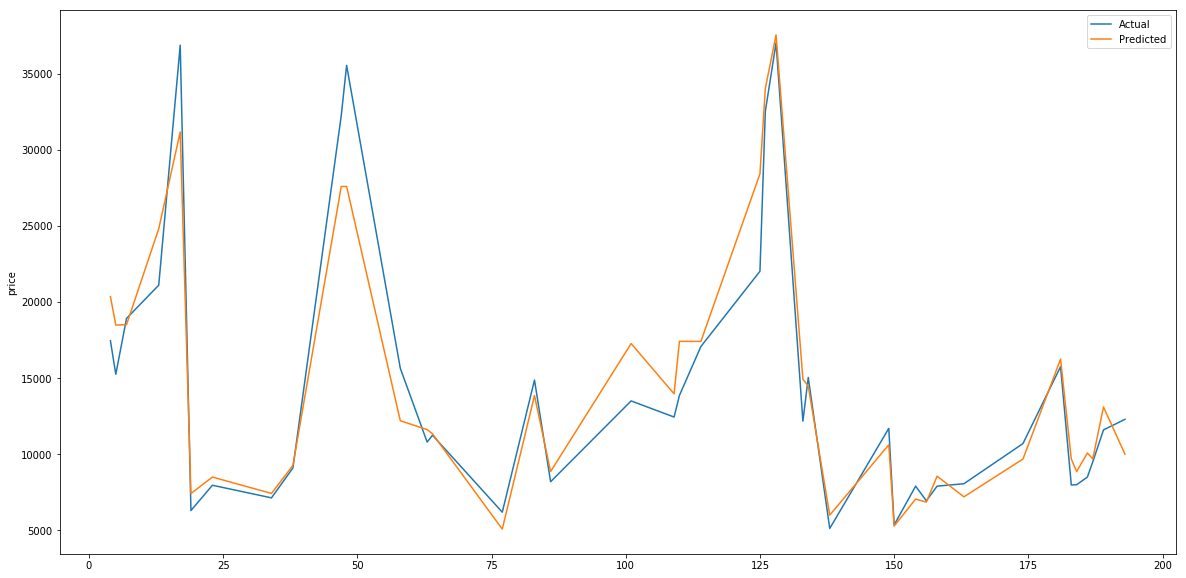

In [55]:
# Compare actual and predicted values
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [56]:
## SGD - Stochastic Gradient Descent
from sklearn.svm import LinearSVR 
model = LinearSVR()
model.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [57]:
y_pred = model.predict(X_test)

In [58]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.77


## RandomForestRegressor 

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.94


d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
